In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import defaultdict

import numpy as np
import seaborn_image as isns

from denoising import (
    generate_synthetic,
    Environment,
    save_grayscale,
)
from denoising.data import BSD300

isns.set_context('notebook')  # this will create thicker lines and larger fonts than usual
isns.set_image(cmap='gray', despine=True)  # set the colormap and despine the axes

In [3]:
# загружаем переменные окружения
env = Environment(_env_file='../env')
env.data

PosixPath('/home/d.nesterov/data')

# Генерация синтетической зашумленной выборки

In [4]:
# инициализируем датасеты. изображения загружаются в память
dset_train = BSD300(env.data / 'BSDS300', mode='train')
dset_test = BSD300(env.data / 'BSDS300', mode='test')
len(dset_train), len(dset_test)

(200, 100)

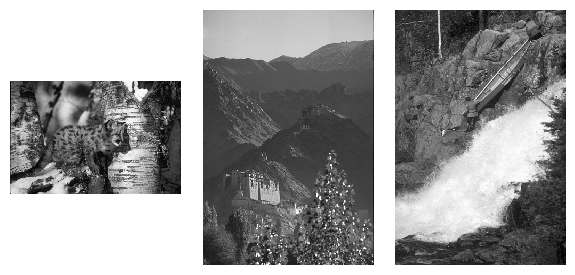

In [5]:
# посмотрим на несколько примеров
_ = isns.ImageGrid([dset_train[i] for i in range(3)], cbar=False)

In [6]:
# посмотрим на распределение вертикальных/горизонтальных изображений
for dset, dset_part in zip([dset_train, dset_test], ['train', 'test'], strict=False):
    cnt = defaultdict(int)
    for img in dset:
        cnt[img.shape] += 1

In [7]:
variances = [0.01, 0.001]
dset_parts = list(zip([dset_train, dset_test], ['train', 'test'], strict=False))
verbose = True

In [8]:
for variance in variances:
    for dset, dset_part in dset_parts:
        clean_src, noisy_src = generate_synthetic(dset, variance, env.random_seed, verbose=verbose)

        # оставляем пока что только горизонтальные изображения,
        # тк в обучении хотим обойтись без resize
        def is_horizontal(img: np.ndarray) -> bool:
            height, width = img.shape[:2]
            return height <= width

        clean = [img for img in clean_src if is_horizontal(img)]
        noisy = [img for img in noisy_src if is_horizontal(img)]

        folder = (
            env.data / 'BSDS300-horizontal-synthetic' / f'gauss-noise-{variance}' / f'{dset_part}'
        )
        folder.mkdir(exist_ok=True, parents=True)
        for i, (img_noisy, img_clean) in enumerate(zip(noisy, clean, strict=False)):
            save_grayscale(folder / f'noisy-{i:05}.jpg', img_noisy * 255)
            save_grayscale(folder / f'clean-{i:05}.jpg', img_clean * 255)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 263.64it/s]
[ WARN:0@40.847] global loadsave.cpp:848 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 357.25it/s]
